# Portfolio Basics

## Course overview
* ch1 Porfolio weights and returns
* ch2 Portfolio performance evaluation
* ch3 Drivers of Performance
* ch4 Portofolio Optimization

## To avoid large losses
* carefully select deversified portfolios
* backtest portfolio strategy
* constant monitoring of portfolio performance

In [29]:
require(quantmod)
require(PerformanceAnalytics)

[1] "PEP" "KO"

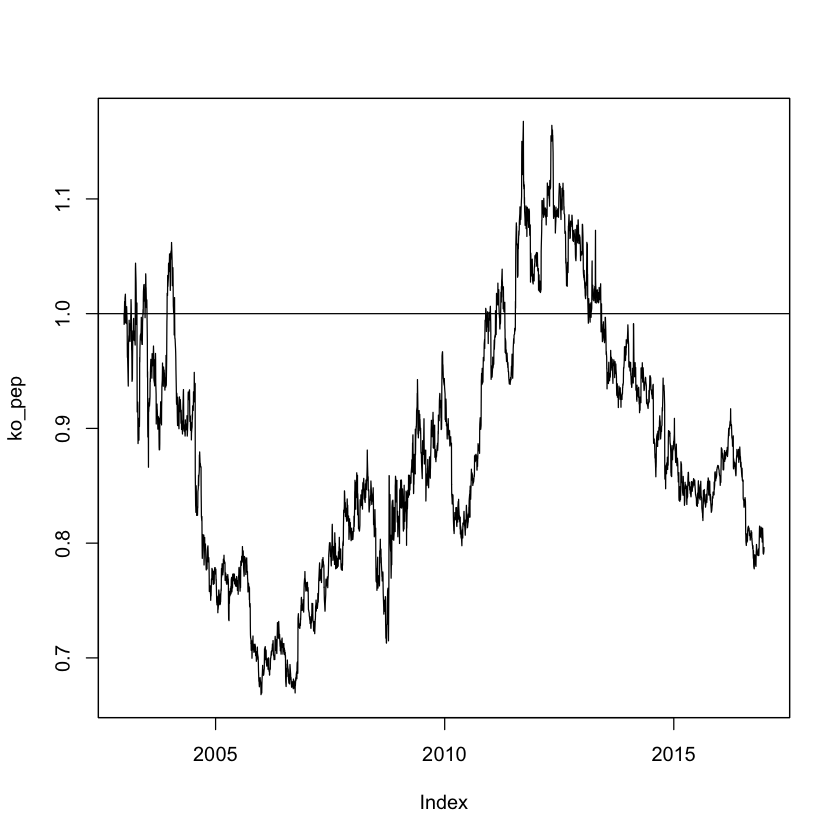

In [8]:
##first example show how two companies (pepsico and coca-kola) selling similar products
# can have a evolving relative value
ticker<-new.env()
getSymbols(c('PEP','KO'), env=tickerb, src="yahoo", from=as.Date("2003-01-02") )
ko<-Ad(ticker$KO)  # adjusted value
ko<-ko/as.numeric(ko[1]) #normalize by first element
pep<-Ad(ticker$PEP)
pep<-pep/as.numeric(pep[1])
ko_pep <-ko/pep #ratio of two tickers
plot.zoo(ko_pep)
abline(h=1)

## Portfolio weights
For N investments $V_1,..V_N$ the i_th weight $w_i = \frac{V_i}{\sum_i^N V_i}$

### analyzing values of portfolio weights reveal the investment bets

In [13]:
#simple R to compute weights given amounts for each asset class 
# Define the vector values
values <- c(4000,4000,2000)
names(values) <- c("Equities", "Bonds", "Commodities")
# Define the vector weights
weights <- values/sum(values)

# Print the resulting weights Sum of weights always yields to 1
print(weights)


   Equities       Bonds Commodities 
        0.4         0.4         0.2 


![title](alloc_strat.png)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001442 0.003389 0.018030 0.100000 0.115400 0.576900 

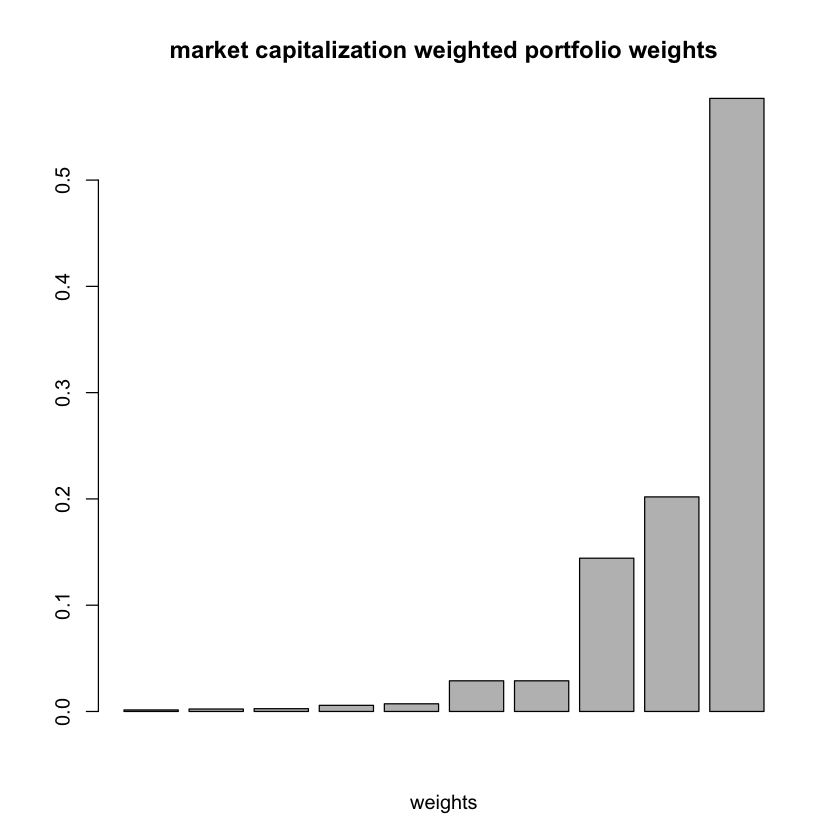

In [15]:
#a simple example of market capitalization weighted portfolio
#using 10 market capitalisations in millions USD
# Define marketcaps
marketcaps<-c(5, 8, 9, 20, 25, 100, 100, 500, 700, 2000) 
  
# Compute the weights
weights <- marketcaps/sum(marketcaps)
  
# Inspect summary statistics
summary(weights)
  
# Create a barplot of weights
  barplot(weights,main="market capitalization weighted portfolio weights" , xlab="weights")
# the bigget weigth comes for a biggest marketcap

# Porfolio Returns
### return is a relative change  in value
$$ R = \frac{EMV-BMV}{BMV} $$
### 3 steps
* initial portfolio value = sum of N investments at initial date
* final portfolio value = sum of N investment values at final date
* $$  R=\frac{finalValue - initialValue}{initialValue} $$


![title](ex_2assets_ret_1.png)

# Portfolio return also
$$PortfolioReturn = w_1 R_1 + w_2 R_2+..+w_n R_n$$
where  
$$w_i=\frac{Asset_i}{\sum_i^N Asset_i}$$
and 
$$ R_i =\frac{EMV(Asset_i)-BMV(Asset_i)}{BMV(Asset_i)}$$

In [22]:
## so the previous example using the sum of weighted returns formula
bmv<-c(200,300)
emv<-c(180,330)
wgh<-bmv/sum(bmv)
ret<-(emv-bmv)/bmv
print(wgh) #weights
print(ret) #2 asset individual returns
r_prtf <- sum(wgh*ret) #portfolio return
print(r_prtf)

[1] 0.4 0.6
[1] -0.1  0.1
[1] 0.02


In [24]:
#first chain-link example
#first period you make 10%  but second period you loose 5% 
#Q what is the final value of $1000 invested ?

1000*(1+0.1)*(1-0.05)

[1] 1045

In [ ]:
(1-0.5)*(1+x)=1

### Q. after a loss of 50% in 1 period what should be a return in the next period to pare a loss?

In [25]:
#(1-0.5)*(1+x) = 1
#1+x-0.5-0.5x=1
#0.5x=0.5
#x=1
## i.e. you need a 100% return to erase a previous 50% loss 

## The practioner's challenge
* in practice, time series of portfolio returns
* longer history means more info on portfolio available

### use PerformanceAnalytics Package

### Dynamics of Porfolio Weights  2 approaches
* Set initial weights  and do not intervene
* actively change portfolio weights. (**Rebalancing**)

